# Perceptrons

In [37]:
# Import libraries
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:100,:2]  # we only take the first two features.
Y = iris.target[:100]

### Line separating the features. Change this to get lines separating the features

In [39]:
# Line parameters
m = 0  # Slope
c = 2  # Intercept

# Creating line
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y1 = m*x1 + c

### Let's plot this!

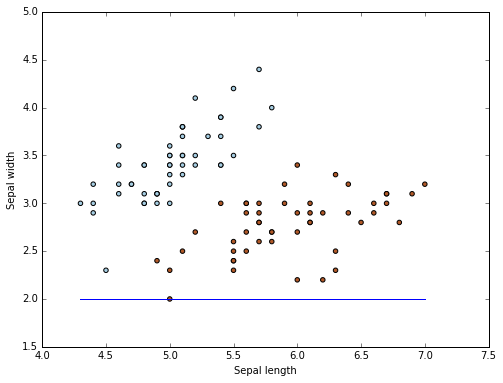

In [40]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x1,y1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [41]:
# Create perceptron
threshold = 1

# Get weights using the line equations from above
w2 = threshold / c
w1 = -1 * w2 * m

# Perceptron calculation
plant_class = ((X[:,0] * w1 + X[:,1] * w2) > threshold) + 0

# Compare
correctly_classified = np.all(plant_class == Y)


In [42]:
correctly_classified

False

### A real perceptron

In [43]:
from random import choice
from numpy import array, dot, random

def unit_step(x,theta):
    ''' This is our activation function. '''
    fx = 0
    if x < theta:
        fx= 0
    else:
        fx= 1
    return fx

training_data = [
    array([0,0,1]),
    array([0,1,1]),
    array([1,0,1]),
    array([1,1,1]),
]

target = [0,1,1,1]

w = random.rand(3) # Initializing weights randomly.
errors = []
eta = 0.2 # Learning rate
n = 100 # Number of iterations
theta = 0.25 # Threshold

for i in xrange(n):
    x, expected = choice(zip(training_data,target))
    result = dot(w, x)
    error = expected - unit_step(result,theta)
    errors.append(error)
    w += eta * error * x

for x, _ in zip(training_data,target):
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result,theta)))

[0 0]: 0.133950529264 -> 0
[0 1]: 0.970928541087 -> 1
[1 0]: 0.449833020953 -> 1
[1 1]: 1.28681103278 -> 1


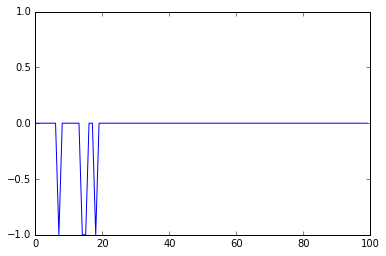

In [44]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)

(0, 1)

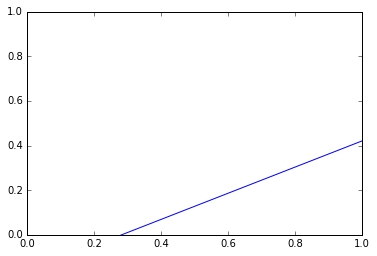

In [63]:
k = np.linspace(0,1,100)
plt.plot(k,-(w[0]/w[1])*k + theta/w[1])
plt.xlim((0,1))
plt.ylim((0,1))

### Let's use it for Iris!

In [59]:
training_data = X

training_data = [np.append(x,[1]) for x in training_data]
target = Y
w = random.rand(3) # Initializing weights randomly.
errors = []
eta = 0.2 # Learning rate
n = 100 # Number of iterations
theta = 0.25 # Threshold

for i in xrange(n):
    x, expected = choice(zip(training_data,target))
    result = dot(w, x)
    error = expected - unit_step(result,theta)
    errors.append(error)
    w += eta * error * x

for x, _ in zip(training_data,target):
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result,theta)))

[ 5.1  3.5]: -0.965646602575 -> 0
[ 4.9  3. ]: -0.387295630712 -> 0
[ 4.7  3.2]: -0.866420360257 -> 0
[ 4.6  3.1]: -0.803846810342 -> 0
[ 5.   3.6]: -1.20520896735 -> 0
[ 5.4  3.9]: -1.30443520967 -> 0
[ 4.6  3.4]: -1.25705068237 -> 0
[ 5.   3.4]: -0.90307305266 -> 0
[ 4.4  2.9]: -0.678699710511 -> 0
[ 4.9  3.1]: -0.538363588056 -> 0
[ 5.4  3.7]: -1.00229929498 -> 0
[ 4.8  3.4]: -1.08006186752 -> 0
[ 4.8  3. ]: -0.47579003814 -> 0
[ 4.3  3. ]: -0.918262075284 -> 0
[ 5.8  4. ]: -1.10152553729 -> 0
[ 5.7  4.4]: -1.7942917741 -> 0
[ 5.4  3.9]: -1.30443520967 -> 0
[ 5.1  3.5]: -0.965646602575 -> 0
[ 5.7  3.8]: -0.887884030035 -> 0
[ 5.1  3.8]: -1.41885047461 -> 0
[ 5.4  3.4]: -0.549095422945 -> 0
[ 5.1  3.7]: -1.26778251726 -> 0
[ 4.6  3.6]: -1.55918659706 -> 0
[ 5.1  3.3]: -0.663510687887 -> 0
[ 4.8  3.4]: -1.08006186752 -> 0
[ 5.  3.]: -0.298801223283 -> 0
[ 5.   3.4]: -0.90307305266 -> 0
[ 5.2  3.5]: -0.877152195146 -> 0
[ 5.2  3.4]: -0.726084237802 -> 0
[ 4.7  3.2]: -0.866420360257 -> 

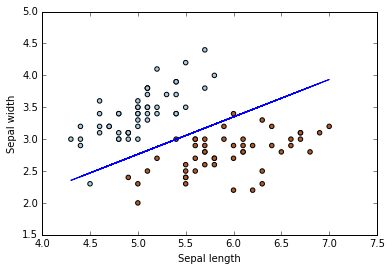

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(X[:,0],-(w[0]/w[1])*X[:,0] + theta/w[1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
